In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Bài tập 1:** Cài đặt và thực thi thuật toán KNN cho tập dữ liệu teleCust1000t.csv biết rằng dữ liệu test có kích thước 33% so với tập dữ liệu với K là 20 và p = 2. In ra các chỉ số đánh giá mô hình.

In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Đọc dữ liệu từ tập tin CSV
data = pd.read_csv("/content/drive/MyDrive/NLMH_OnkiemTra/Chap2_Classification_K-NearestNeighbors/teleCust1000t.csv")
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


**Tiền xử lý dữ liệu:**

In [4]:
# Chia features (đặc trưng) và target (mục tiêu)
X = data.iloc[:, 1:-1]  # Bỏ cột đầu tiên (customerID) và cột cuối cùng (custcat) để lấy các đặc trưng
y = data['custcat']  # Chọn cột 'custcat' làm mục tiêu

# Chuyển đổi đặc trưng và mục tiêu sang dạng mảng numpy
X = np.array(X)
y = np.array(y)

# Chia dữ liệu thành tập train và tập test với tỷ lệ 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Huấn luyện mô hình KNN và dự đoán trên tập test:**

In [5]:
# Khởi tạo và huấn luyện mô hình KNN
k = 20
p = 2
knn = KNeighborsClassifier(n_neighbors=k, p=p)
knn.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = knn.predict(X_test)

**In ra các chỉ số đánh giá mô hình:**

In [6]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.3696969696969697
Precision: 0.37098565329074656
Recall: 0.3696969696969697
F1 Score: 0.3495972778542997


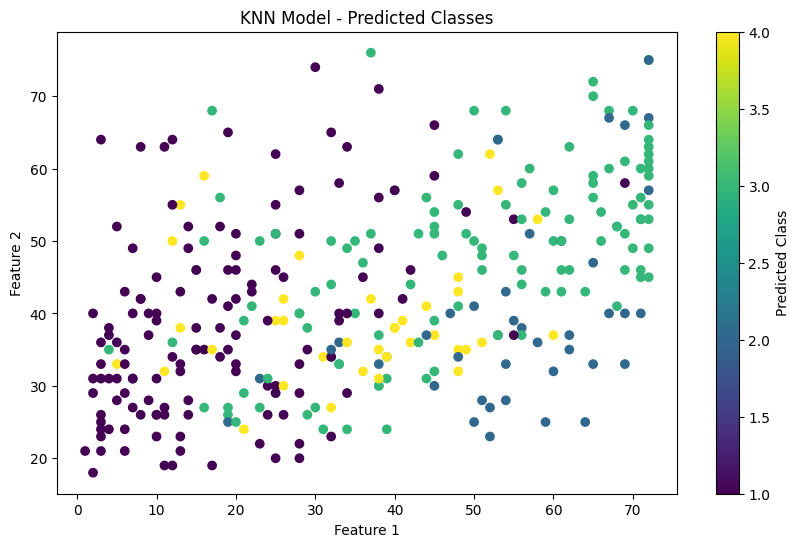

In [7]:
# In hình đồ họa
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Model - Predicted Classes')
plt.colorbar(label='Predicted Class')
plt.show()